# 데이터 전처리

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import keras
import tensorflow as tf
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#from keras.preprocessing.sequence import pad_sequences
#warnings.filterwarnings('ignore')

In [ ]:
detail = pd.read_csv('detail.csv')
wish = pd.read_csv('wish.csv')
book = pd.read_csv('book_info.csv', encoding='cp949')

In [ ]:
gnbgnb = pd.read_csv('gnbgnb.csv')

In [ ]:
cali = pd.read_csv('cali.csv')

In [ ]:
michi = pd.read_csv('michi.csv')

In [ ]:
george = pd.read_csv('george.csv')

In [ ]:
michi = michi.drop(michi.columns[[0, 4, 9, 10]], axis=1)

In [ ]:
michi.to_csv('michigan_cleansed.csv', index= False, encoding= 'utf-8')

In [ ]:
cali

,Unnamed: 0,isbn,organization,purchase,vector,title,Cn_1,Cn_2,Cn_3,encoded_c_id,encoded_book_id,prediction
0,1,2001235001112,University of California Berkeley,0.0,"[0.12254615873098373, 0.19181329011917114, -0....",우리삶 우리놀이,취미실용스포츠,무용,전통무용,1,0,0.000586
1,4,2002365000426,University of California Berkeley,0.0,"[0.1613045185804367, -0.013575300574302673, -0...",심소 김천흥 무악칠십년,예술대중문화,예술일반,예술가이야기,1,1,0.109972
2,7,2002365000846,University of California Berkeley,0.0,"[0.12661844491958618, -0.01438160426914692, -0...",조선여속고,역사문화,민속학,민속학,1,2,0.074981
3,10,2005694000068,University of California Berkeley,0.0,"[0.15218043327331543, 0.018629997968673706, -0...",겨레 음악,예술대중문화,음악,국악,1,3,0.009825
4,13,2006272006502,University of California Berkeley,0.0,"[0.005144462920725346, 0.0017249477095901966, ...",한국현대시의 색채의식연구,인문,한국문학론,한국문학이론,1,4,0.192224
...,...,...,...,...,...,...,...,...,...,...,...,...
2329,6988,9791197758607,University of California Berkeley,0.0,"[-0.0075219860300421715, 0.052941955626010895,...",서경식 다시 읽기,인문,문학이론,문학비평평론,1,2312,0.014183
2330,6991,9791197785009,University of California Berkeley,0.0,"[0.06540963053703308, 0.028739936649799347, -0...",사회경제사로 다시보는 민초의 역사,역사문화,한국사,한국통사,1,2313,0.078113
2331,6994,9791197795800,University of California Berkeley,0.0,"[0.028216328471899033, 0.05459612235426903, -0...",국제인권법과 차별금지법제,정치사회,사회문제복지,사회문제,1,2314,0.005877
2332,6997,9791197848001,University of California Berkeley,0.0,"[0.0855594128370285, -0.054056160151958466, -0...",The Lamp of the East(동방의 등불)(한국명수필한영대역시리즈 4),시에세이,나라별 에세이,한국에세이,1,2315,0.002197


In [ ]:
cali = cali.drop(cali.columns[[0, 4, 9, 10]], axis=1)

In [ ]:
george = george.drop(george.columns[[0, 4, 9, 10]], axis=1)

In [ ]:
cali

,isbn,organization,title,Cn_1,Cn_2,Cn_3,prediction
0,2001235001112,University of California Berkeley,우리삶 우리놀이,취미실용스포츠,무용,전통무용,0.000586
1,2002365000426,University of California Berkeley,심소 김천흥 무악칠십년,예술대중문화,예술일반,예술가이야기,0.109972
2,2002365000846,University of California Berkeley,조선여속고,역사문화,민속학,민속학,0.074981
3,2005694000068,University of California Berkeley,겨레 음악,예술대중문화,음악,국악,0.009825
4,2006272006502,University of California Berkeley,한국현대시의 색채의식연구,인문,한국문학론,한국문학이론,0.192224
...,...,...,...,...,...,...,...
2329,9791197758607,University of California Berkeley,서경식 다시 읽기,인문,문학이론,문학비평평론,0.014183
2330,9791197785009,University of California Berkeley,사회경제사로 다시보는 민초의 역사,역사문화,한국사,한국통사,0.078113
2331,9791197795800,University of California Berkeley,국제인권법과 차별금지법제,정치사회,사회문제복지,사회문제,0.005877
2332,9791197848001,University of California Berkeley,The Lamp of the East(동방의 등불)(한국명수필한영대역시리즈 4),시에세이,나라별 에세이,한국에세이,0.002197


In [ ]:
cali.to_csv('california_cleansed.csv', index= False, encoding= 'utf-8')

In [ ]:
george.to_csv('george_cleansed.csv', index= False, encoding= 'utf-8')

In [ ]:
data = pd.read_csv('george_cleansed.csv')

In [ ]:
data

,isbn,organization,title,Cn_1,Cn_2,Cn_3,prediction
0,2001235001112,George Washington University,우리삶 우리놀이,취미실용스포츠,무용,전통무용,8.934368e-07
1,2002365000426,George Washington University,심소 김천흥 무악칠십년,예술대중문화,예술일반,예술가이야기,7.437128e-06
2,2002365000846,George Washington University,조선여속고,역사문화,민속학,민속학,2.020004e-05
3,2005694000068,George Washington University,겨레 음악,예술대중문화,음악,국악,1.724726e-06
4,2006272006502,George Washington University,한국현대시의 색채의식연구,인문,한국문학론,한국문학이론,7.476565e-05
...,...,...,...,...,...,...,...
2329,9791197758607,George Washington University,서경식 다시 읽기,인문,문학이론,문학비평평론,9.213704e-07
2330,9791197785009,George Washington University,사회경제사로 다시보는 민초의 역사,역사문화,한국사,한국통사,1.574159e-04
2331,9791197795800,George Washington University,국제인권법과 차별금지법제,정치사회,사회문제복지,사회문제,2.006078e-05
2332,9791197848001,George Washington University,The Lamp of the East(동방의 등불)(한국명수필한영대역시리즈 4),시에세이,나라별 에세이,한국에세이,5.594337e-06


In [ ]:
gnb = gnbgnb

In [ ]:
company = pd.read_csv('gnb.csv')

In [ ]:
data

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,company_name
0,9791196314071,정치/사회,사회학,여성학/남성학,여성학/여성문제,여성 청년 정치: 페미니스트 정치를 말하다,"류소연, 김진리, 주승리","""허스토리\r""\r",University of Michigan
1,9791186396681,기술/공학,생활과학,식품학,식품학이론,한국식품사연구(양장본 HardCover),이철호,"""식안연\r""\r",University of Michigan
2,9791162447024,인문,인문학일반,인문교양,인문교양,코로나 시대의 말과 글(숙명여자대학교 교양교육연구소 총서 1),"황영미, 김헌, 유홍식, 이도흠, 홍성민, 김응교, 오영진, 김중철, 신희선","""역락\r""\r",University of Michigan
3,9791162446362,인문,한국문학론,한국문학이론,한국현대문학론,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),김지율,"""역락\r""\r",University of Michigan
4,9791162445143,소설,일본소설,고전소설/문학선,고전소설/문학선,누구(경성일보 문학· 문화 총서 9),"에밀 가보리오, 후세 생 (번안)","""역락\r""\r",University of Michigan
...,...,...,...,...,...,...,...,...,...
2341,9788943307844,어린이(초등),어린이문학,동화책,외국작가,섬(어른과 아이가 함께 보는 그림책)(양장본 HardCover),아민 그레더,"""보림\r""\r",George Washington University
2342,9788954640343,어린이(초등),어린이문학,동시/동요,동시/동요,달에서 온 아이 엄동수(양장본 HardCover),김륭,"""문학동네\r""\r",George Washington University
2343,9788993454659,인문,언어학,국어학,국어이야기,한국어 경어법의 기능과 사용 원리(한국어 경어법 연구 총서 3),이정복,"""소통\r""\r",George Washington University
2344,9788994006734,소설,한국소설,한국소설일반,한국소설일반,바이링궐 에디션 한국 대표 소설 세트 2(전15권),이문열,"""아시아\r""\r",George Washington University


In [ ]:
company = company.drop(['Cn_1','Cn_2', 'Cn_3','Cn_4', 'company_name'], axis =1)

In [ ]:
company

,isbn
0,9791196314071
1,9791186396681
2,9791162447024
3,9791162446362
4,9791162445143
...,...
2339,9788961473774
2340,9788994833552
2341,9788993454659
2342,9788994006734


In [ ]:
data.

# Create gnb_title

In [ ]:
gnb = pd.merge(data, publish, left_on='isbn', right_on='isbn', how='inner')

In [ ]:
publish

,isbn,publication_date
0,2000151036468,2006-01-01
1,2000127000059,1976-08-01
2,2000107000024,1994-12-26
3,2000156000150,1996-09-10
4,2000156000198,2001-09-29
...,...,...
1025493,9791125938323,2018-10-15
1025494,9791125938347,2018-10-15
1025495,9791125938378,2018-10-16
1025496,9791125938361,2018-10-16


In [ ]:
duplicate_gnb = gnbgnb[gnbgnb.duplicated()]

In [ ]:
duplicate_gnb

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,company_name
186,9788955186086,한국소개도서,한국어학습,한국어학습 일반,한국어학습 일반,뉴 이지 코리안 4B(New Easy Korean for foreigners)(개정...,Easy Korean Academy,"""한글파크\r""\r",University of Michigan


In [ ]:
gnbgnb.drop_duplicates(subset =['isbn', 'Cn_1', 'Cn_2', 'Cn_3', 'Cn_4', 'title', 'author', 'publisher',  'company_name'], keep = 'first', inplace = True)

In [ ]:
gnb

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,company_name
0,9791197205118,예술/대중문화,영화,영화이야기,영화이야기,대중의 철학이 된 영화,"심광현, 유진화","""희망읽기\r""\r",University of Michigan
1,9791155222768,정치/사회,사회문제/복지,노동문제,노동조합/협동조합,민주노총전북본부 20년사 세트(전2권),"남춘호, 이성호, 차유미, 강문식, 노중기, 이현진, 조용화","""흐름출판사\r""\r",University of Michigan
2,9788965965022,역사/문화,한국사,조선시대,조선왕조사,태종 평전,박현모,"""흐름출판\r""\r",University of Michigan
3,9791165370824,정치/사회,정부간행물,정부간행물,정부간행물,제주특별자치도립무용단 30년사,제주특별자치도 문화예술진흥원,"""휴먼컬처아리랑\r""\r",University of Michigan
4,9791159679599,정치/사회,정부간행물,정부간행물,정부간행물,안성의 세시풍속,안성맞춤박물관,"""휴먼컬처아리랑\r""\r",University of Michigan
...,...,...,...,...,...,...,...,...,...
2329,9781635190250,한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Learning Korean Through Tasks,"YouJin Kim, Bumyong Choi, Hyunae Yun, Binna Ki...","""공앤박\r""\r",George Washington University
2330,9781635190199,한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Anytime Korean Intermediate 1,"Sangbok Kim, Sang-Seok Yoon, Jieun Kim","""공앤박\r""\r",George Washington University
2331,9781635190243,한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Anytime Korean Intermediate 2,"Sangbok Kim, Sang-Seok Yoon, Jieun Kim","""공앤박\r""\r",George Washington University
2332,9781635190151,한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Anytime Korean Beginning 1,"Sangbok Kim, Jaemin Roh, Danielle O. Pyun","""공앤박\r""\r",George Washington University


In [ ]:
duplicate = gnb[gnb.duplicated()]

In [ ]:
duplicate

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,company_name


In [ ]:
gnb.rename(columns = {'company_name':'organization'}, inplace = True)

In [ ]:
gnb

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,organization
0,9791197205118,예술/대중문화,영화,영화이야기,영화이야기,대중의 철학이 된 영화,"심광현, 유진화","""희망읽기\r""\r",University of Michigan
1,9791155222768,정치/사회,사회문제/복지,노동문제,노동조합/협동조합,민주노총전북본부 20년사 세트(전2권),"남춘호, 이성호, 차유미, 강문식, 노중기, 이현진, 조용화","""흐름출판사\r""\r",University of Michigan
2,9788965965022,역사/문화,한국사,조선시대,조선왕조사,태종 평전,박현모,"""흐름출판\r""\r",University of Michigan
3,9791165370824,정치/사회,정부간행물,정부간행물,정부간행물,제주특별자치도립무용단 30년사,제주특별자치도 문화예술진흥원,"""휴먼컬처아리랑\r""\r",University of Michigan
4,9791159679599,정치/사회,정부간행물,정부간행물,정부간행물,안성의 세시풍속,안성맞춤박물관,"""휴먼컬처아리랑\r""\r",University of Michigan
...,...,...,...,...,...,...,...,...,...
2329,9781635190250,한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Learning Korean Through Tasks,"YouJin Kim, Bumyong Choi, Hyunae Yun, Binna Ki...","""공앤박\r""\r",George Washington University
2330,9781635190199,한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Anytime Korean Intermediate 1,"Sangbok Kim, Sang-Seok Yoon, Jieun Kim","""공앤박\r""\r",George Washington University
2331,9781635190243,한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Anytime Korean Intermediate 2,"Sangbok Kim, Sang-Seok Yoon, Jieun Kim","""공앤박\r""\r",George Washington University
2332,9781635190151,한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,Anytime Korean Beginning 1,"Sangbok Kim, Jaemin Roh, Danielle O. Pyun","""공앤박\r""\r",George Washington University


In [ ]:
gnb.isnull().sum()

isbn            0
Cn_1            0
Cn_2            0
Cn_3            0
Cn_4            0
title           0
author          0
publisher       0
organization    0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,company_name
0,9791196314071,정치/사회,사회학,여성학/남성학,여성학/여성문제,여성 청년 정치: 페미니스트 정치를 말하다,"류소연, 김진리, 주승리","""허스토리\r""\r",University of Michigan
1,9791186396681,기술/공학,생활과학,식품학,식품학이론,한국식품사연구(양장본 HardCover),이철호,"""식안연\r""\r",University of Michigan
2,9791162447024,인문,인문학일반,인문교양,인문교양,코로나 시대의 말과 글(숙명여자대학교 교양교육연구소 총서 1),"황영미, 김헌, 유홍식, 이도흠, 홍성민, 김응교, 오영진, 김중철, 신희선","""역락\r""\r",University of Michigan
3,9791162446362,인문,한국문학론,한국문학이론,한국현대문학론,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),김지율,"""역락\r""\r",University of Michigan
4,9791162445143,소설,일본소설,고전소설/문학선,고전소설/문학선,누구(경성일보 문학· 문화 총서 9),"에밀 가보리오, 후세 생 (번안)","""역락\r""\r",University of Michigan
...,...,...,...,...,...,...,...,...,...
2329,9788943307844,어린이(초등),어린이문학,동화책,외국작가,섬(어른과 아이가 함께 보는 그림책)(양장본 HardCover),아민 그레더,"""보림\r""\r",George Washington University
2330,9788954640343,어린이(초등),어린이문학,동시/동요,동시/동요,달에서 온 아이 엄동수(양장본 HardCover),김륭,"""문학동네\r""\r",George Washington University
2331,9788993454659,인문,언어학,국어학,국어이야기,한국어 경어법의 기능과 사용 원리(한국어 경어법 연구 총서 3),이정복,"""소통\r""\r",George Washington University
2332,9788994006734,소설,한국소설,한국소설일반,한국소설일반,바이링궐 에디션 한국 대표 소설 세트 2(전15권),이문열,"""아시아\r""\r",George Washington University


In [ ]:
gnb = gnbgnb

In [ ]:
gnb.rename(columns = {'company_name':'organization'}, inplace = True)

In [ ]:
gnb.publication_date[0][:4]

'2021'

In [ ]:
for i in range(len(gnb)):
  gnb.publication_date[i] = gnb.publication_date[i][:4]

In [ ]:
m = gnb.loc[gnb['organization'] == 'University of Michigan']
cb = gnb.loc[gnb['organization'] == 'University of California Berkeley']
gw = gnb.loc[gnb['organization'] == 'George Washington University']

# Create df

In [ ]:
df = pd.merge(gnb_title, book_info, left_on='isbn', right_on='isbn', how='left')

In [ ]:
df

,isbn,organization,Cn_1,Cn_2,Cn_3,Cn_4,company_name,title,author,publisher
0,9791196314071,University of Michigan,정치/사회,사회학,여성학/남성학,여성학/여성문제\r\r,University of Michigan,여성 청년 정치: 페미니스트 정치를 말하다,"류소연, 김진리, 주승리",허스토리
1,9791186396681,University of Michigan,기술/공학,생활과학,식품학,식품학이론\r\r,University of Michigan,한국식품사연구(양장본 HardCover),이철호,식안연
2,9791162447024,University of Michigan,인문,인문학일반,인문교양,인문교양\r\r,University of Michigan,코로나 시대의 말과 글(숙명여자대학교 교양교육연구소 총서 1),"황영미, 김헌, 유홍식, 이도흠, 홍성민, 김응교, 오영진, 김중철, 신희선",역락
3,9791162446362,University of Michigan,인문,한국문학론,한국문학이론,한국현대문학론\r\r,University of Michigan,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),김지율,역락
4,9791162446362,University of Michigan,인문,한국문학론,한국문학이론,한국현대문학론\r\r,University of California Berkeley,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),김지율,역락
...,...,...,...,...,...,...,...,...,...,...
2374,9788961473774,University of Michigan,인문,인문학일반,인문교양,인문교양\r\r,University of Michigan,인공지능과 포스트휴머니즘(서울시립대 미래철학총서 1),"이중원 (엮음), 강미정, 김경미, 신상규, 신중휘, 양천수, 이경민, 이영준, 이...",이학사
2375,9788994833552,University of California Berkeley,시/에세이,한국시,현대시,현대시\r\r,University of California Berkeley,"광주, 뜨거운 부활의 도시","김창규, 김태수, 나종영, 박몽구",시와문화
2376,9788993454659,George Washington University,인문,언어학,국어학,국어이야기\r\r,George Washington University,한국어 경어법의 기능과 사용 원리(한국어 경어법 연구 총서 3),이정복,소통
2377,9788994006734,George Washington University,소설,한국소설,한국소설일반,한국소설일반\r\r,George Washington University,바이링궐 에디션 한국 대표 소설 세트 2(전15권),이문열,아시아


In [ ]:
m_df = df.loc[df['organization'] == 'University of Michigan']
cb_df = df.loc[df['organization'] == 'University of California Berkeley']
gw_df = df.loc[df['organization'] == 'George Washington University']

In [ ]:
duplicate_df = df[df.duplicated()]

In [ ]:
df = gnb

# 설치

In [1]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 46.1 MB/s 
     |████████████████████████████████| 465 kB 23.4 MB/s 


In [2]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 4.89 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-11-08 06:13:00--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bb

In [3]:
pip install mecab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 975 kB/s 
  Created wheel for mecab: filename=mecab-0.996.3-cp37-cp37m-linux_x86_64.whl size=141827 sha256=ff9b3a8c76487124602bcd97fb4a3cb4b325be36b24eef51aa06fafd963c717f
  Stored in directory: /root/.cache/pip/wheels/5e/f7/45/44f3cc6fabafa8882d6a467ade862ca2a6f1d1f7555ce1c909
Successfully built mecab


In [4]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Rea

In [5]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [6]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141810 sha256=4998378c4ab22f8aec3a7f94864586902d1fa3ee0563a23f9395655a54047baf
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [7]:
import pandas as pd
from konlpy.tag import Mecab
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm

In [8]:
from konlpy.tag import Mecab

In [9]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=58dd4017c269df2f123925706314d243e1c25f1592386ff12f2362f1f379ea1c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [10]:
import wget

In [11]:
wget.download("https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz")

'mecab-0.996-ko-0.9.2.tar.gz'

In [12]:
!tar -xzvf "mecab-0.996-ko-0.9.2.tar.gz"

mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/example.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.c
mecab-0.996-ko-0.9.2/example/example.c
mecab-0.996-ko-0.9.2/example/thread_test.cpp
mecab-0.996-ko-0.9.2/mecab-config.in
mecab-0.996-ko-0.9.2/man/
mecab-0.996-ko-0.9.2/man/Makefile.am
mecab-0.996-ko-0.9.2/man/mecab.1
mecab-0.996-ko-0.9.2/man/Makefile.in
mecab-0.996-ko-0.9.2/mecab.iss.in
mecab-0.996-ko-0.9.2/config.guess
mecab-0.996-ko-0.9.2/README
mecab-0.996-ko-0.9.2/COPYING
mecab-0.996-ko-0.9.2/CHANGES.md
mecab-0.996-ko-0.9.2/README.md
mecab-0.996-ko-0.9.2/INSTALL
mecab-0.996-ko-0.9.2/config.sub
mecab-0.996-ko-0.9.2/configure.in
mecab-0.996-ko-0.9.2/swig/
mecab-0.996-ko-0.9.2/swig/Makefile
mecab-0.996-ko-0.9.2/swig/version.h.in
mecab-0.996-ko-0.9.2/swig/version.h
mecab-0.996-ko-0.9.2/swig/MeCab.i
mecab-0.996-ko-0.9.2/aclocal.m4
mecab-0.996-ko-0.9.2/LGPL
mecab-0.996-ko-0.9.2/Makefile.am
mecab-0.996-

In [13]:
%cd  /content/mecab-0.996-ko-0.9.2

! ./configure
! make
! make check
! sudo make install

/content/mecab-0.996-ko-0.9.2
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... none
checking for g++... g++
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking dependency style of g++... none
checking how to run the C preprocessor... gcc -E
checkin

In [14]:
wget.download("https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz")

'mecab-ko-dic-2.1.1-20180720.tar.gz'

In [15]:
!tar -xzvf "mecab-ko-dic-2.1.1-20180720.tar.gz"

mecab-ko-dic-2.1.1-20180720/
mecab-ko-dic-2.1.1-20180720/configure
mecab-ko-dic-2.1.1-20180720/COPYING
mecab-ko-dic-2.1.1-20180720/autogen.sh
mecab-ko-dic-2.1.1-20180720/Place-station.csv
mecab-ko-dic-2.1.1-20180720/NNG.csv
mecab-ko-dic-2.1.1-20180720/README
mecab-ko-dic-2.1.1-20180720/EF.csv
mecab-ko-dic-2.1.1-20180720/MAG.csv
mecab-ko-dic-2.1.1-20180720/Preanalysis.csv
mecab-ko-dic-2.1.1-20180720/NNB.csv
mecab-ko-dic-2.1.1-20180720/Person-actor.csv
mecab-ko-dic-2.1.1-20180720/VV.csv
mecab-ko-dic-2.1.1-20180720/Makefile.in
mecab-ko-dic-2.1.1-20180720/matrix.def
mecab-ko-dic-2.1.1-20180720/EC.csv
mecab-ko-dic-2.1.1-20180720/NNBC.csv
mecab-ko-dic-2.1.1-20180720/clean
mecab-ko-dic-2.1.1-20180720/ChangeLog
mecab-ko-dic-2.1.1-20180720/J.csv
mecab-ko-dic-2.1.1-20180720/.keep
mecab-ko-dic-2.1.1-20180720/feature.def
mecab-ko-dic-2.1.1-20180720/Foreign.csv
mecab-ko-dic-2.1.1-20180720/XPN.csv
mecab-ko-dic-2.1.1-20180720/EP.csv
mecab-ko-dic-2.1.1-20180720/NR.csv
mecab-ko-dic-2.1.1-20180720/left-

In [16]:
%cd  cd mecab-ko-dic-2.1.1-20180720

! ./configure
! make
! make check
! sudo make install

[Errno 2] No such file or directory: 'cd mecab-ko-dic-2.1.1-20180720'
/content/mecab-0.996-ko-0.9.2
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... none
checking for g++... g++
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking dependency style o

In [17]:
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git

Cloning into 'mecab-python-0.996'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [18]:
%cd  mecab-python-0.996

! ./configure
! python setup.py build
! python3 setup.py install

/content/mecab-0.996-ko-0.9.2/mecab-python-0.996
/bin/bash: ./configure: No such file or directory
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
copying MeCab.py -> build/lib.linux-x86_64-3.7
running build_ext
building '_MeCab' extension
creating build/temp.linux-x86_64-3.7
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/include -I/usr/include/python3.7m -c MeCab_wrap.cxx -o build/temp.linux-x86_64-3.7/MeCab_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 -Wl,-Bsymbolic-functions -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.7/MeCab_wrap.o -L/usr/local/lib -lmecab -

# Doc2Vec 전처리

In [ ]:
df = data

In [ ]:
df['author'] = df['author'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['publisher'] = df['publisher'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


for i in range(1,5):
  c = "Cn_"+str(i)
  df[c] = df[c].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
df

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,company_name
0,9791196314071,정치사회,사회학,여성학남성학,여성학여성문제,여성 청년 정치: 페미니스트 정치를 말하다,류소연 김진리 주승리,허스토리,University of Michigan
1,9791186396681,기술공학,생활과학,식품학,식품학이론,한국식품사연구(양장본 HardCover),이철호,식안연,University of Michigan
2,9791162447024,인문,인문학일반,인문교양,인문교양,코로나 시대의 말과 글(숙명여자대학교 교양교육연구소 총서 1),황영미 김헌 유홍식 이도흠 홍성민 김응교 오영진 김중철 신희선,역락,University of Michigan
3,9791162446362,인문,한국문학론,한국문학이론,한국현대문학론,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),김지율,역락,University of Michigan
4,9791162445143,소설,일본소설,고전소설문학선,고전소설문학선,누구(경성일보 문학· 문화 총서 9),에밀 가보리오 후세 생 번안,역락,University of Michigan
...,...,...,...,...,...,...,...,...,...
2329,9788943307844,어린이초등,어린이문학,동화책,외국작가,섬(어른과 아이가 함께 보는 그림책)(양장본 HardCover),아민 그레더,보림,George Washington University
2330,9788954640343,어린이초등,어린이문학,동시동요,동시동요,달에서 온 아이 엄동수(양장본 HardCover),김륭,문학동네,George Washington University
2331,9788993454659,인문,언어학,국어학,국어이야기,한국어 경어법의 기능과 사용 원리(한국어 경어법 연구 총서 3),이정복,소통,George Washington University
2332,9788994006734,소설,한국소설,한국소설일반,한국소설일반,바이링궐 에디션 한국 대표 소설 세트 2(전15권),이문열,아시아,George Washington University


In [ ]:
mecab = Mecab()

depth1_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Cn_1']
  tag = row['title']
  depth1_list.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(depth1_list))

100%|██████████| 2334/2334 [00:00<00:00, 10212.70it/s]

문서의 수 : 2334


In [ ]:
mecab = Mecab()
tagged_corpus_list2 = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text2 = row['author']
  tag2 = row['title']
  tagged_corpus_list2.append(TaggedDocument(tags=[tag2], words=mecab.morphs(text2)))

print('문서의 수 :', len(tagged_corpus_list2))

100%|██████████| 2334/2334 [00:00<00:00, 8149.95it/s]

문서의 수 : 2334


In [ ]:
mecab = Mecab()
tagged_corpus_list3 = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text3 = row['publisher']
  tag3 = row['title']
  tagged_corpus_list3.append(TaggedDocument(tags=[tag3], words=mecab.morphs(text3)))

print('문서의 수 :', len(tagged_corpus_list3))

100%|██████████| 2334/2334 [00:00<00:00, 5183.59it/s]

문서의 수 : 2334


In [ ]:
mecab = Mecab()

depth2_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text4 = row['Cn_2']
  tag = row['title']
  depth2_list.append(TaggedDocument(tags=[tag], words=mecab.morphs(text4)))

print('문서의 수 :', len(depth2_list))

100%|██████████| 2334/2334 [00:00<00:00, 9920.06it/s] 

문서의 수 : 2334


In [ ]:
mecab = Mecab()

depth3_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text5 = row['Cn_3']
  tag = row['title']
  depth3_list.append(TaggedDocument(tags=[tag], words=mecab.morphs(text5)))

print('문서의 수 :', len(depth3_list))

100%|██████████| 2334/2334 [00:00<00:00, 9612.43it/s]

문서의 수 : 2334


In [ ]:
mecab = Mecab()

depth4_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text6 = row['Cn_4']
  tag = row['title']
  depth4_list.append(TaggedDocument(tags=[tag], words=mecab.morphs(text6)))

print('문서의 수 :', len(depth4_list))

100%|██████████| 2334/2334 [00:00<00:00, 8934.10it/s]

문서의 수 : 2334


In [ ]:
from gensim.models import doc2vec

In [ ]:
model = doc2vec.Doc2Vec(vector_size=120, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model.build_vocab(depth1_list)
print(f"Tag Size: {len(model.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model.train(depth1_list, total_examples=model.corpus_count, epochs=50)

# 모델 저장
model.save('concat.doc2vec')

Tag Size: 2317 / 

In [ ]:
model2 = doc2vec.Doc2Vec(vector_size=20, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model2.build_vocab(depth1_list)
print(f"Tag Size: {len(model2.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model2.train(depth1_list, total_examples=model2.corpus_count, epochs=50)

# 모델 저장
model2.save('d1.doc2vec')

Tag Size: 2317 / 

In [ ]:
model5 = doc2vec.Doc2Vec(vector_size=20, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model5.build_vocab(depth2_list)
print(f"Tag Size: {len(model5.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model5.train(depth2_list, total_examples=model5.corpus_count, epochs=50)

# 모델 저장
model5.save('d2.doc2vec')

Tag Size: 2317 / 

In [ ]:
model6 = doc2vec.Doc2Vec(vector_size=20, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model6.build_vocab(depth3_list)
print(f"Tag Size: {len(model6.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model6.train(depth3_list, total_examples=model6.corpus_count, epochs=50)

# 모델 저장
model6.save('d3.doc2vec')

Tag Size: 2317 / 

In [ ]:
model7 = doc2vec.Doc2Vec(vector_size=20, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model7.build_vocab(depth4_list)
print(f"Tag Size: {len(model7.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model7.train(depth4_list, total_examples=model7.corpus_count, epochs=50)

# 모델 저장
model7.save('d4.doc2vec')

Tag Size: 2317 / 

In [ ]:
model3 = doc2vec.Doc2Vec(vector_size=20, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model3.build_vocab(tagged_corpus_list3)
print(f"Tag Size: {len(model3.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model3.train(tagged_corpus_list3, total_examples=model3.corpus_count, epochs=50)

# 모델 저장
model3.save('dart_3.doc2vec')

Tag Size: 2317 / 

In [ ]:
model4 = doc2vec.Doc2Vec(vector_size=20, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model4.build_vocab(tagged_corpus_list2)
print(f"Tag Size: {len(model4.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model4.train(tagged_corpus_list2, total_examples=model4.corpus_count, epochs=50)

# 모델 저장
model4.save('dart_4.doc2vec')

Tag Size: 2317 / 

# Vector 저장

In [ ]:
vector = np.zeros((len(df), 20)).astype(np.float32)

for i in range(len(df)):
    vector[i] = model2.docvecs[df.iloc[i]['title']]

In [ ]:
vector2 = np.zeros((len(df), 20)).astype(np.float32)

for i in range(len(df)):
    vector2[i] = model3.docvecs[df.iloc[i]['title']]

In [ ]:
vector3 = np.zeros((len(df), 20)).astype(np.float32)

for i in range(len(df)):
    vector3[i] = model4.docvecs[df.iloc[i]['title']]

In [ ]:
vector4 = np.zeros((len(df), 20)).astype(np.float32)

for i in range(len(df)):
    vector4[i] = model5.docvecs[df.iloc[i]['title']]

In [ ]:
vector5 = np.zeros((len(df), 20)).astype(np.float32)

for i in range(len(df)):
    vector5[i] = model6.docvecs[df.iloc[i]['title']]

In [ ]:
vector6 = np.zeros((len(df), 20)).astype(np.float32)

for i in range(len(df)):
    vector6[i] = model7.docvecs[df.iloc[i]['title']]

In [ ]:
vector[0]

array([-0.06833816,  0.02883258, -0.11375517, -0.11355946, -0.11993216,
       -0.09566632, -0.07043029,  0.06258798,  0.01385927, -0.02021759,
       -0.02532171, -0.02972751,  0.03534018, -0.00784973,  0.03081455,
        0.01017732,  0.04070516,  0.01843807,  0.07901774, -0.02126837],
      dtype=float32)

In [ ]:
vector2[0]

array([-0.05396106, -0.12908663, -0.5577646 ,  0.16471699, -0.3985825 ,
       -0.08641876, -0.4096193 , -0.02440011,  0.1047891 , -0.04026521,
        0.18210723, -0.07224651, -0.01742273, -0.20247126,  0.12833466,
        0.12927213,  0.258358  ,  0.14754298, -0.01738784, -0.2050214 ],
      dtype=float32)

In [ ]:
vector_merge = np.hstack((vector, vector2, vector3, vector4, vector5, vector6))

In [ ]:
for i in range(len(df)):
    slot = model.docvecs.int_index(df.iloc[i]['title'], 
                               model.docvecs.doctags,
                               model.docvecs.max_rawint)
    model.docvecs.vectors_docs[slot] = vector_merge[i]

In [ ]:
df['vector'] = np.stack(vector_merge).tolist()

In [ ]:
df

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,organization,vector,purchase
0,9791196314071,정치사회,사회학,여성학남성학,여성학여성문제,여성 청년 정치: 페미니스트 정치를 말하다,류소연 김진리 주승리,허스토리,University of Michigan,"[-0.06833815574645996, 0.028832579031586647, -...",1
1,9791186396681,기술공학,생활과학,식품학,식품학이론,한국식품사연구(양장본 HardCover),이철호,식안연,University of Michigan,"[-0.39751312136650085, 0.08957039564847946, -0...",1
2,9791162447024,인문,인문학일반,인문교양,인문교양,코로나 시대의 말과 글(숙명여자대학교 교양교육연구소 총서 1),황영미 김헌 유홍식 이도흠 홍성민 김응교 오영진 김중철 신희선,역락,University of Michigan,"[-0.07597941160202026, -0.10519872605800629, -...",1
3,9791162446362,인문,한국문학론,한국문학이론,한국현대문학론,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),김지율,역락,University of Michigan,"[-0.09624502062797546, 0.023170698434114456, -...",1
4,9791162445143,소설,일본소설,고전소설문학선,고전소설문학선,누구(경성일보 문학· 문화 총서 9),에밀 가보리오 후세 생 번안,역락,University of Michigan,"[-0.11298796534538269, 0.015947991982102394, -...",1
...,...,...,...,...,...,...,...,...,...,...,...
2329,9788943307844,어린이초등,어린이문학,동화책,외국작가,섬(어른과 아이가 함께 보는 그림책)(양장본 HardCover),아민 그레더,보림,George Washington University,"[-0.24661660194396973, 0.12057758122682571, -0...",1
2330,9788954640343,어린이초등,어린이문학,동시동요,동시동요,달에서 온 아이 엄동수(양장본 HardCover),김륭,문학동네,George Washington University,"[-0.2792808413505554, 0.07736723124980927, -0....",1
2331,9788993454659,인문,언어학,국어학,국어이야기,한국어 경어법의 기능과 사용 원리(한국어 경어법 연구 총서 3),이정복,소통,George Washington University,"[-0.0520673468708992, -0.02026064321398735, -0...",1
2332,9788994006734,소설,한국소설,한국소설일반,한국소설일반,바이링궐 에디션 한국 대표 소설 세트 2(전15권),이문열,아시아,George Washington University,"[-0.06337004154920578, 0.002090800553560257, -...",1


In [ ]:
#df.drop(['Cn_1', 'Cn_2', 'Cn_3', 'Cn_4'], axis =1)

In [ ]:
df2 = pd.DataFrame(df, columns=['isbn','title', 'Cn_1', 'Cn_2', 'Cn_3', 'Cn_4', 'vector'])

# 전체 data 만들기

In [ ]:
df.rename(columns = {'company_name':'organization'}, inplace = True)

In [ ]:
df['purchase'] = 1

In [ ]:
book = df["isbn"].unique().tolist()

In [ ]:
book_df = pd.DataFrame(book, columns =['isbn'])
book_df

,isbn
0,9791196314071
1,9791186396681
2,9791162447024
3,9791162446362
4,9791162445143
...,...
2312,9788943307844
2313,9788954640343
2314,9788993454659
2315,9788994006734


In [ ]:
book_df = pd.merge(book_df, df2, left_on='isbn', right_on='isbn', how='inner')

In [ ]:
df

,isbn,Cn_1,Cn_2,Cn_3,Cn_4,title,author,publisher,organization,vector,purchase
0,9791196314071,정치사회,사회학,여성학남성학,여성학여성문제,여성 청년 정치: 페미니스트 정치를 말하다,류소연 김진리 주승리,허스토리,University of Michigan,"[-0.06833815574645996, 0.028832579031586647, -...",1
1,9791186396681,기술공학,생활과학,식품학,식품학이론,한국식품사연구(양장본 HardCover),이철호,식안연,University of Michigan,"[-0.39751312136650085, 0.08957039564847946, -0...",1
2,9791162447024,인문,인문학일반,인문교양,인문교양,코로나 시대의 말과 글(숙명여자대학교 교양교육연구소 총서 1),황영미 김헌 유홍식 이도흠 홍성민 김응교 오영진 김중철 신희선,역락,University of Michigan,"[-0.07597941160202026, -0.10519872605800629, -...",1
3,9791162446362,인문,한국문학론,한국문학이론,한국현대문학론,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),김지율,역락,University of Michigan,"[-0.09624502062797546, 0.023170698434114456, -...",1
4,9791162445143,소설,일본소설,고전소설문학선,고전소설문학선,누구(경성일보 문학· 문화 총서 9),에밀 가보리오 후세 생 번안,역락,University of Michigan,"[-0.11298796534538269, 0.015947991982102394, -...",1
...,...,...,...,...,...,...,...,...,...,...,...
2329,9788943307844,어린이초등,어린이문학,동화책,외국작가,섬(어른과 아이가 함께 보는 그림책)(양장본 HardCover),아민 그레더,보림,George Washington University,"[-0.24661660194396973, 0.12057758122682571, -0...",1
2330,9788954640343,어린이초등,어린이문학,동시동요,동시동요,달에서 온 아이 엄동수(양장본 HardCover),김륭,문학동네,George Washington University,"[-0.2792808413505554, 0.07736723124980927, -0....",1
2331,9788993454659,인문,언어학,국어학,국어이야기,한국어 경어법의 기능과 사용 원리(한국어 경어법 연구 총서 3),이정복,소통,George Washington University,"[-0.0520673468708992, -0.02026064321398735, -0...",1
2332,9788994006734,소설,한국소설,한국소설일반,한국소설일반,바이링궐 에디션 한국 대표 소설 세트 2(전15권),이문열,아시아,George Washington University,"[-0.06337004154920578, 0.002090800553560257, -...",1


In [ ]:
book_df

,isbn,title,Cn_1,Cn_2,Cn_3,Cn_4,vector
0,9791196314071,여성 청년 정치: 페미니스트 정치를 말하다,정치사회,사회학,여성학남성학,여성학여성문제,"[-0.06833815574645996, 0.028832579031586647, -..."
1,9791186396681,한국식품사연구(양장본 HardCover),기술공학,생활과학,식품학,식품학이론,"[-0.39751312136650085, 0.08957039564847946, -0..."
2,9791162447024,코로나 시대의 말과 글(숙명여자대학교 교양교육연구소 총서 1),인문,인문학일반,인문교양,인문교양,"[-0.07597941160202026, -0.10519872605800629, -..."
3,9791162446362,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),인문,한국문학론,한국문학이론,한국현대문학론,"[-0.09624502062797546, 0.023170698434114456, -..."
4,9791162446362,한국 현대시의 근대성과 미적 부정성(양장본 HardCover),인문,한국문학론,한국문학이론,한국현대문학론,"[-0.09624502062797546, 0.023170698434114456, -..."
...,...,...,...,...,...,...,...
2329,9788943307844,섬(어른과 아이가 함께 보는 그림책)(양장본 HardCover),어린이초등,어린이문학,동화책,외국작가,"[-0.24661660194396973, 0.12057758122682571, -0..."
2330,9788954640343,달에서 온 아이 엄동수(양장본 HardCover),어린이초등,어린이문학,동시동요,동시동요,"[-0.2792808413505554, 0.07736723124980927, -0...."
2331,9788993454659,한국어 경어법의 기능과 사용 원리(한국어 경어법 연구 총서 3),인문,언어학,국어학,국어이야기,"[-0.0520673468708992, -0.02026064321398735, -0..."
2332,9788994006734,바이링궐 에디션 한국 대표 소설 세트 2(전15권),소설,한국소설,한국소설일반,한국소설일반,"[-0.06337004154920578, 0.002090800553560257, -..."


In [ ]:
df3 = df.groupby(['isbn', 'organization'])['purchase'].max().unstack().fillna(0)

In [ ]:
data = df3.stack().reset_index(name = 'purchase')

In [ ]:
data

,isbn,organization,purchase
0,2001235001112,George Washington University,0.0
1,2001235001112,University of California Berkeley,0.0
2,2001235001112,University of Michigan,1.0
3,2002365000426,George Washington University,0.0
4,2002365000426,University of California Berkeley,0.0
...,...,...,...
6946,9791197848001,University of California Berkeley,0.0
6947,9791197848001,University of Michigan,1.0
6948,9798985606997,George Washington University,0.0
6949,9798985606997,University of California Berkeley,0.0


In [ ]:
data = pd.merge(data, book_df, left_on='isbn', right_on='isbn', how='inner')

In [ ]:
data

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector
0,2001235001112,George Washington University,0.0,우리삶 우리놀이,취미실용스포츠,무용,전통무용,전통무용,"[-0.33173152804374695, 0.06341876089572906, -0..."
1,2001235001112,University of California Berkeley,0.0,우리삶 우리놀이,취미실용스포츠,무용,전통무용,전통무용,"[-0.33173152804374695, 0.06341876089572906, -0..."
2,2001235001112,University of Michigan,1.0,우리삶 우리놀이,취미실용스포츠,무용,전통무용,전통무용,"[-0.33173152804374695, 0.06341876089572906, -0..."
3,2002365000426,George Washington University,0.0,심소 김천흥 무악칠십년,예술대중문화,예술일반,예술가이야기,예술가이야기,"[-0.26657426357269287, 0.05017397180199623, -0..."
4,2002365000426,University of California Berkeley,0.0,심소 김천흥 무악칠십년,예술대중문화,예술일반,예술가이야기,예술가이야기,"[-0.26657426357269287, 0.05017397180199623, -0..."
...,...,...,...,...,...,...,...,...,...
6997,9791197848001,University of California Berkeley,0.0,The Lamp of the East(동방의 등불)(한국명수필한영대역시리즈 4),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.1245281845331192, 0.06506925821304321, -0...."
6998,9791197848001,University of Michigan,1.0,The Lamp of the East(동방의 등불)(한국명수필한영대역시리즈 4),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.1245281845331192, 0.06506925821304321, -0...."
6999,9798985606997,George Washington University,0.0,Called by Another Name,한국소개도서,한국역사,한국역사,한국역사,"[-0.17092029750347137, -0.18191128969192505, -..."
7000,9798985606997,University of California Berkeley,0.0,Called by Another Name,한국소개도서,한국역사,한국역사,한국역사,"[-0.17092029750347137, -0.18191128969192505, -..."


# Encoding

In [ ]:
user_ids = data["organization"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoede2user = {i: x for i, x in enumerate(user_ids)}

book_ids = data["isbn"].unique().tolist()
book2book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded2book = {i: x for i, x in enumerate(book_ids)}
data["encoded_c_id"] = data["organization"].map(user2user_encoded)
data["encoded_book_id"] = data["isbn"].map(book2book_encoded)

In [ ]:
data

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id
0,2001235001112,George Washington University,0.0,우리삶 우리놀이,취미실용스포츠,무용,전통무용,전통무용,"[-0.33173152804374695, 0.06341876089572906, -0...",0,0
1,2001235001112,University of California Berkeley,0.0,우리삶 우리놀이,취미실용스포츠,무용,전통무용,전통무용,"[-0.33173152804374695, 0.06341876089572906, -0...",1,0
2,2001235001112,University of Michigan,1.0,우리삶 우리놀이,취미실용스포츠,무용,전통무용,전통무용,"[-0.33173152804374695, 0.06341876089572906, -0...",2,0
3,2002365000426,George Washington University,0.0,심소 김천흥 무악칠십년,예술대중문화,예술일반,예술가이야기,예술가이야기,"[-0.26657426357269287, 0.05017397180199623, -0...",0,1
4,2002365000426,University of California Berkeley,0.0,심소 김천흥 무악칠십년,예술대중문화,예술일반,예술가이야기,예술가이야기,"[-0.26657426357269287, 0.05017397180199623, -0...",1,1
...,...,...,...,...,...,...,...,...,...,...,...
6997,9791197848001,University of California Berkeley,0.0,The Lamp of the East(동방의 등불)(한국명수필한영대역시리즈 4),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.1245281845331192, 0.06506925821304321, -0....",1,2315
6998,9791197848001,University of Michigan,1.0,The Lamp of the East(동방의 등불)(한국명수필한영대역시리즈 4),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.1245281845331192, 0.06506925821304321, -0....",2,2315
6999,9798985606997,George Washington University,0.0,Called by Another Name,한국소개도서,한국역사,한국역사,한국역사,"[-0.17092029750347137, -0.18191128969192505, -...",0,2316
7000,9798985606997,University of California Berkeley,0.0,Called by Another Name,한국소개도서,한국역사,한국역사,한국역사,"[-0.17092029750347137, -0.18191128969192505, -...",1,2316


# Test, Train split

In [ ]:
train, test = train_test_split(data,test_size = 0.2)
print(train.shape , test.shape)

(5601, 11) (1401, 11)


In [ ]:
number_of_unique_user = len(data.encoded_c_id.unique())
number_of_unique_book_id = len(data.encoded_book_id.unique())
print(number_of_unique_user, number_of_unique_book_id)

3 2317


In [ ]:
train.purchase.value_counts()

0.0    3731
1.0    1870
Name: purchase, dtype: int64

In [ ]:
test.purchase.value_counts()

0.0    907
1.0    494
Name: purchase, dtype: int64

In [ ]:
train.organization.value_counts()

University of California Berkeley    1900
George Washington University         1862
University of Michigan               1839
Name: organization, dtype: int64

In [ ]:
train.to_csv('trainset.csv', index= False, encoding= 'utf-8')

In [ ]:
sample = pd.read_csv('trainset.csv')

In [ ]:
sample

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id
0,9788954650168,George Washington University,0.0,당신의 별이 사라지던 밤,소설,한국소설,미스터리스릴러소설,미스터리스릴러소설,"[-0.08502001315355301, -0.041271477937698364, ...",0,433
1,9788982226526,George Washington University,0.0,경희 한국어 중급 2: 문법(경희대)(경희대 한국어 교재 시리즈),한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,"[-0.14347665011882782, -0.19770106673240662, -...",0,996
2,9788957694947,George Washington University,0.0,그런 세대는 없다,정치사회,사회학,사회학일반,시사사회비평,"[-0.07978592067956924, 0.054093264043331146, -...",0,534
3,9788992308229,University of California Berkeley,0.0,노래했을 뿐이다(인물시 2),시에세이,한국시,현대시,현대시,"[-0.09621474146842957, 0.122512586414814, -0.0...",1,1152
4,9788984412699,University of Michigan,1.0,삼보의 언덕에 오르다,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11294862627983093, 0.15264953672885895, -0...",2,1025
...,...,...,...,...,...,...,...,...,...,...,...
5596,9791188810802,University of California Berkeley,0.0,SF는 공상하지 않는다,인문,문학이론,문학비평평론,문학비평평론,"[-0.08231944590806961, -0.019882917404174805, ...",1,1943
5597,9791187124696,University of California Berkeley,0.0,국경이 사라진 전쟁,정치사회,정치외교,정치사상,정치혁명테러,"[-0.07907300442457199, -0.009732340462505817, ...",1,1879
5598,9788984336339,George Washington University,0.0,한국전통음악의 전승양상,예술대중문화,음악,국악,국악이론,"[-0.27837181091308594, 0.10622545331716537, -0...",0,1024
5599,9788959727919,George Washington University,0.0,도서관의 미래가치와 영향력,인문,문헌정보학,도서관경영운영,도서관경영운영,"[-0.09074220806360245, -0.032793886959552765, ...",0,575


In [ ]:
test.to_csv('testset.csv', index= False, encoding= 'utf-8')

In [ ]:
X=np.array([np.array(xi) for xi in train.vector])

In [ ]:
Y=np.array([np.array(xi) for xi in test.vector])

In [ ]:
number_of_unique_user = len(train.encoded_c_id.unique())
number_of_unique_book_id = len(train.encoded_book_id.unique())
print(number_of_unique_user, number_of_unique_book_id)

3 2300


In [ ]:
number_of_unique_user = len(test.encoded_c_id.unique())
number_of_unique_book_id = len(test.encoded_book_id.unique())
print(number_of_unique_user, number_of_unique_book_id)

3 1141


# Neural CF

In [ ]:
n_latent_factors_user = 32
n_latent_factors_book = 32
n_latent_factors_mf = 8
n_users, n_books = number_of_unique_user, number_of_unique_book_id

book_input = keras.layers.Input(shape=[120],name='Book')

user_input = keras.layers.Input(shape=[1],name='User')
user_vec_mlp = keras.layers.Flatten(name='FlattenUsers-MLP')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding-MLP')(user_input))

user_vec_mf = keras.layers.Flatten(name='FlattenUsers-MF')(keras.layers.Embedding(n_users + 1, 120,name='User-Embedding-MF')(user_input))

concat = keras.layers.concatenate([book_input, user_vec_mlp], name='Concat')
dense = keras.layers.Dense(32,name='FullyConnected',activation='relu')(concat)
dropout_1 = keras.layers.Dropout(0.1,name='Dropout-1')(dense)
dense_2 = keras.layers.Dense(16,name='FullyConnected-1',activation='relu')(dropout_1)
dropout_2 = keras.layers.Dropout(0.1,name='Dropout-2')(dense_2)

pred_mf = keras.layers.Dot(axes=1)([book_input, user_vec_mf])
pred_mlp = keras.layers.Dense(1, activation='relu',name='Activation')(dropout_2)


combine_mlp_mf = keras.layers.concatenate([pred_mf, pred_mlp] ,name='Concat-MF-MLP')
result_combine = keras.layers.Dense(16,name='Combine-MF-MLP')(combine_mlp_mf)
deep_combine = keras.layers.Dense(8,name='FullyConnected-6')(result_combine)


result = keras.layers.Dense(1,activation = 'sigmoid', kernel_initializer='lecun_uniform', name='Prediction')(deep_combine)

model = keras.Model([user_input, book_input], result)
opt = tf.keras.optimizers.Adam(lr =0.01)
model.compile(optimizer='adam',loss= 'mse', metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 User-Embedding-MLP (Embedding)  (None, 1, 32)       128         ['User[0][0]']                   
                                                                                                  
 Book (InputLayer)              [(None, 120)]        0           []                               
                                                                                                  
 FlattenUsers-MLP (Flatten)     (None, 32)           0           ['User-Embedding-MLP[0][0]']     
                                                                                              

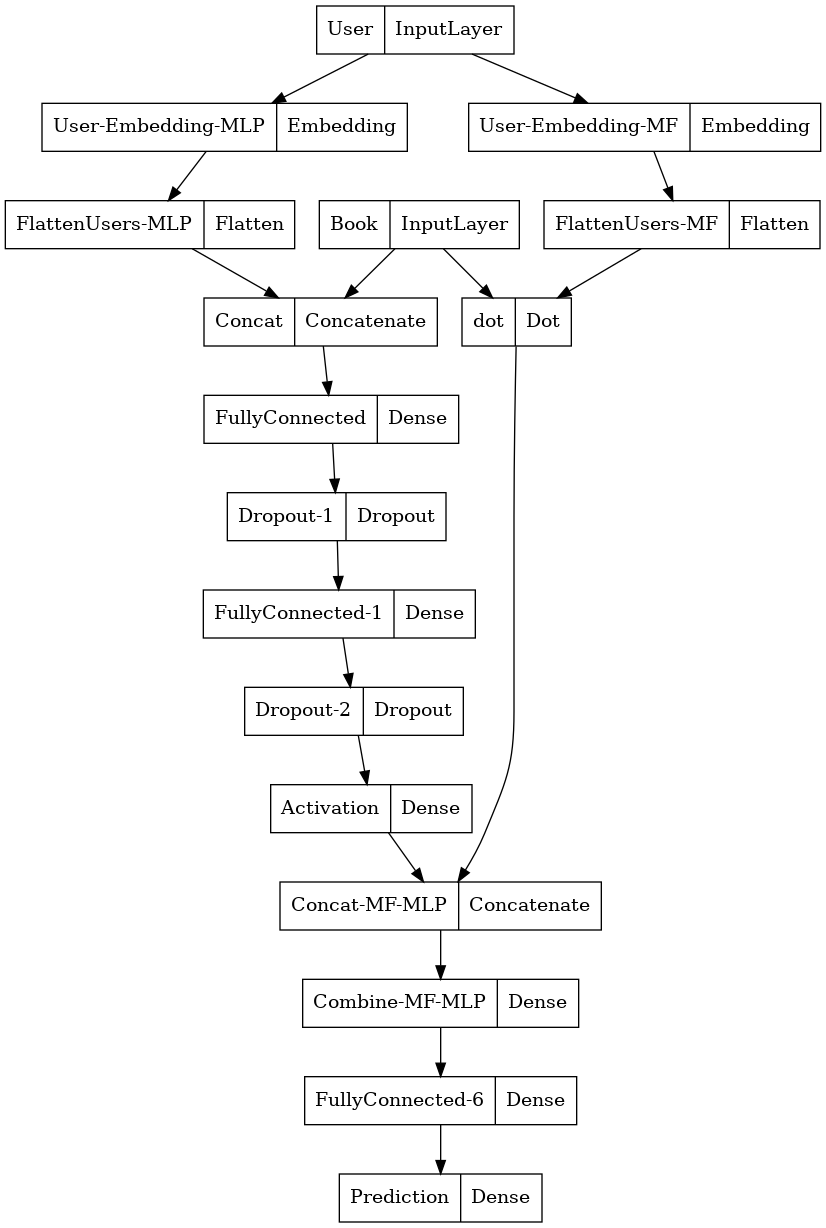

In [ ]:
plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('gb_model{epoch:03d}.h5', period=10)
auc = keras.callbacks.ModelCheckpoint('gb_auc.h5', save_best_only=True, monitor='val_auc', mode='max') 
pre = keras.callbacks.ModelCheckpoint('gb_pre.h5', save_best_only=True, monitor='val_precision', mode='max')
recall = keras.callbacks.ModelCheckpoint('gb_recall.h5', save_best_only=True, monitor='val_recall', mode='max')

In [ ]:
history = model.fit([train.encoded_c_id, X],train.purchase,batch_size = 16,epochs=100,callbacks=[EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=10), checkpoint, auc, pre, recall], verbose=1,validation_split=0.2) 

Epoch 1/100
280/280 [==============================] - 8s 12ms/step - loss: 0.0646 - accuracy: 0.9377 - precision: 0.9362 - recall: 0.8712 - auc: 0.9622 - val_loss: 0.0324 - val_accuracy: 0.9670 - val_precision: 0.9581 - val_recall: 0.9457 - val_auc: 0.9715
Epoch 2/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0334 - accuracy: 0.9652 - precision: 0.9554 - recall: 0.9386 - auc: 0.9715 - val_loss: 0.0312 - val_accuracy: 0.9670 - val_precision: 0.9581 - val_recall: 0.9457 - val_auc: 0.9757
Epoch 3/100
280/280 [==============================] - 1s 4ms/step - loss: 0.0329 - accuracy: 0.9652 - precision: 0.9554 - recall: 0.9386 - auc: 0.9752 - val_loss: 0.0302 - val_accuracy: 0.9670 - val_precision: 0.9581 - val_recall: 0.9457 - val_auc: 0.9760
Epoch 4/100
280/280 [==============================] - 1s 5ms/step - loss: 0.0322 - accuracy: 0.9650 - precision: 0.9547 - recall: 0.9386 - auc: 0.9746 - val_loss: 0.0307 - val_accuracy: 0.9670 - val_precision: 0.9581 - val_reca

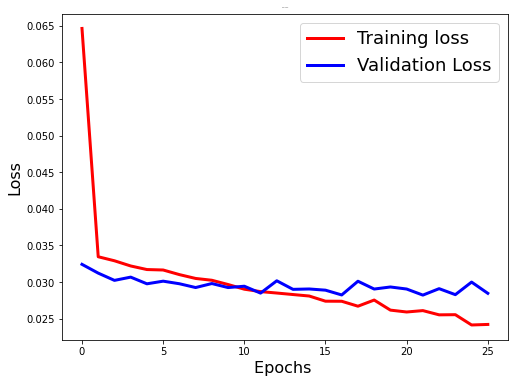

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=1)
plt.show()

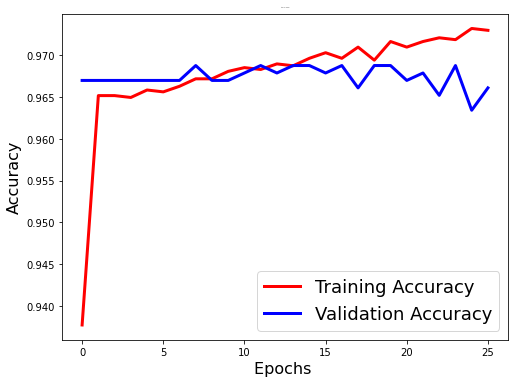

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=1)
plt.show()

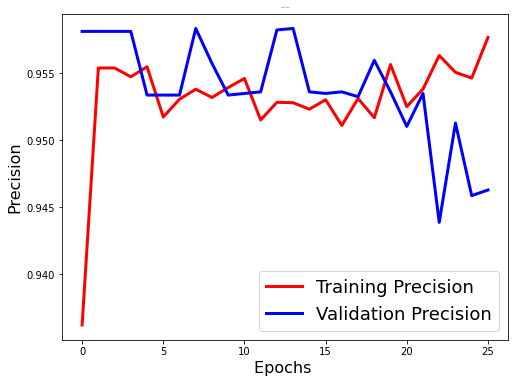

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['precision'],'r',linewidth=3.0)
plt.plot(history.history['val_precision'],'b',linewidth=3.0)
plt.legend(['Training Precision', 'Validation Precision'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Precision',fontsize=16)
plt.title('Precision Curves',fontsize=1)
plt.show()

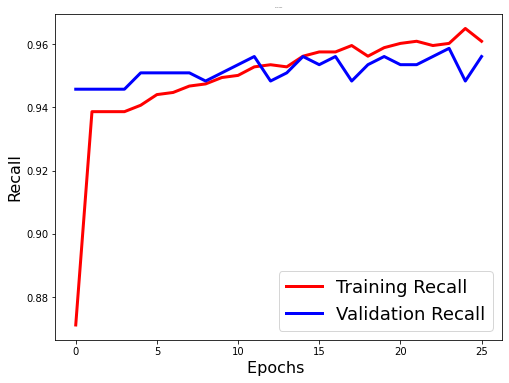

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['recall'],'r',linewidth=3.0)
plt.plot(history.history['val_recall'],'b',linewidth=3.0)
plt.legend(['Training Recall', 'Validation Recall'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Recall',fontsize=16)
plt.title('Recall Curves',fontsize=1)
plt.show()

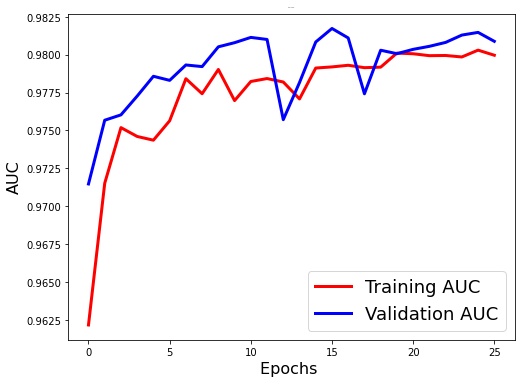

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['auc'],'r',linewidth=3.0)
plt.plot(history.history['val_auc'],'b',linewidth=3.0)
plt.legend(['Training AUC', 'Validation AUC'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('AUC',fontsize=16)
plt.title('AUC Curves',fontsize=1)
plt.show()

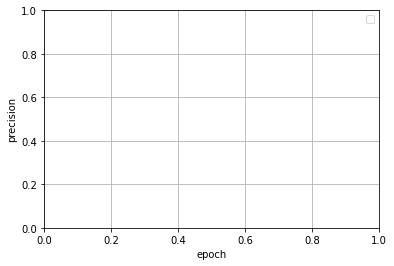

In [ ]:
y_vloss = history.history['val_precision']
y_loss = history.history['precision']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Precision")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Precision")

%matplotlib inline
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('precision')
plt.savefig('test2.png')
plt.show()

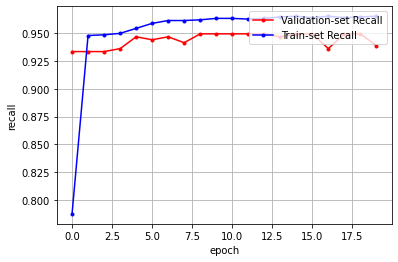

In [ ]:
y_vloss = history.history['val_recall']
y_loss = history.history['recall']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Recall")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Recall")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('recall')
plt.show()

In [ ]:
y_vloss = history.history['val_auc']
y_loss = history.history['auc']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set AUC")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set AUC")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('auc')
plt.show()

# Evaluate

In [ ]:
model_precision = load_model('gb_pre.h5')

In [ ]:
model_recall = load_model('gb_recall.h5')

In [ ]:
model_auc = load_model('gb_auc.h5')

In [ ]:
loss, accuracy, auc, precision, recall = model_precision.evaluate([test.encoded_c_id, Y], test.purchase, verbose=1)

44/44 [==============================] - 1s 3ms/step - loss: 0.0329 - accuracy: 0.9643 - precision: 0.9440 - recall: 0.9555 - auc: 0.9778


In [ ]:
loss, accuracy, auc, precision, recall = model_recall.evaluate([test.encoded_c_id, Y], test.purchase, verbose=1)

44/44 [==============================] - 1s 2ms/step - loss: 0.0324 - accuracy: 0.9657 - precision: 0.9442 - recall: 0.9595 - auc: 0.9733


In [ ]:
loss, accuracy, auc, precision, recall = model_auc.evaluate([test.encoded_c_id, Y], test.purchase, verbose=1)

44/44 [==============================] - 1s 3ms/step - loss: 0.0321 - accuracy: 0.9665 - precision: 0.9443 - recall: 0.9615 - auc: 0.9729


In [ ]:
prediction = model_auc.predict([test.encoded_c_id, Y], test.purchase)

ValueError: ignored

In [ ]:
prediction

array([[4.9388409e-04],
       [6.2836707e-02],
       [9.7900075e-01],
       ...,
       [3.3455942e-06],
       [1.1975522e-04],
       [2.9664739e-05]], dtype=float32)

In [ ]:
test['prediction'] = prediction

In [ ]:
test

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,prediction
6361,9791191114102,University of California Berkeley,0.0,다다다(양장본 HardCover),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11253715306520462, 0.14595149457454681, -0...",1,2103,4.938841e-04
4813,9791162851050,University of California Berkeley,0.0,나는 첫 문장을 기다렸다,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.16732504963874817, 0.08903349936008453, -0...",1,1589,6.283671e-02
4268,9791156862529,University of Michigan,1.0,500 Basic Korean Adjectives(2판),한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,"[-0.12158330529928207, -0.20931103825569153, -...",2,1411,9.790007e-01
1624,9788957752708,University of California Berkeley,0.0,"나비, 날다",소설,한국소설,한국소설일반,한국소설일반,"[-0.09584200382232666, -0.03454800695180893, -...",1,535,1.194215e-02
2896,9788977782525,University of California Berkeley,0.0,신 한일관계론(동아시아재단 연구논총 1)(양장본 HardCover),정치사회,정치외교,외교국제관계,동북아국제관계,"[-0.10573723912239075, 0.06191043183207512, -0...",1,955,1.650572e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
3887,9791128838569,University of Michigan,1.0,김교신 수필선집,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11022262275218964, 0.1436326950788498, -0....",2,1284,9.793190e-01
663,9788936437138,George Washington University,0.0,올빼미의 없음,소설,한국소설,한국소설일반,한국소설일반,"[-0.07539023458957672, 0.006302692927420139, -...",0,217,5.792210e-07
1782,9788960234321,George Washington University,0.0,시인 없는 한국(에세이 작가 총서 317),인문,한국문학론,한국문학이론,한국문학비평,"[-0.11761459708213806, -0.01828603260219097, -...",0,588,3.345594e-06
5521,9791185994239,University of California Berkeley,0.0,노동의 미래(양장본 HardCover),정치사회,사회문제복지,노동문제,노동시장고용노사관련,"[-0.07894471287727356, -0.012525614351034164, ...",1,1824,1.197552e-04


In [ ]:
sample

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id
0,9788954650168,George Washington University,0.0,당신의 별이 사라지던 밤,소설,한국소설,미스터리스릴러소설,미스터리스릴러소설,"[-0.08502001315355301, -0.041271477937698364, ...",0,433
1,9788982226526,George Washington University,0.0,경희 한국어 중급 2: 문법(경희대)(경희대 한국어 교재 시리즈),한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,"[-0.14347665011882782, -0.19770106673240662, -...",0,996
2,9788957694947,George Washington University,0.0,그런 세대는 없다,정치사회,사회학,사회학일반,시사사회비평,"[-0.07978592067956924, 0.054093264043331146, -...",0,534
3,9788992308229,University of California Berkeley,0.0,노래했을 뿐이다(인물시 2),시에세이,한국시,현대시,현대시,"[-0.09621474146842957, 0.122512586414814, -0.0...",1,1152
4,9788984412699,University of Michigan,1.0,삼보의 언덕에 오르다,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11294862627983093, 0.15264953672885895, -0...",2,1025
...,...,...,...,...,...,...,...,...,...,...,...
5596,9791188810802,University of California Berkeley,0.0,SF는 공상하지 않는다,인문,문학이론,문학비평평론,문학비평평론,"[-0.08231944590806961, -0.019882917404174805, ...",1,1943
5597,9791187124696,University of California Berkeley,0.0,국경이 사라진 전쟁,정치사회,정치외교,정치사상,정치혁명테러,"[-0.07907300442457199, -0.009732340462505817, ...",1,1879
5598,9788984336339,George Washington University,0.0,한국전통음악의 전승양상,예술대중문화,음악,국악,국악이론,"[-0.27837181091308594, 0.10622545331716537, -0...",0,1024
5599,9788959727919,George Washington University,0.0,도서관의 미래가치와 영향력,인문,문헌정보학,도서관경영운영,도서관경영운영,"[-0.09074220806360245, -0.032793886959552765, ...",0,575


In [ ]:
list_train = train.title.unique().tolist()
list_test = test.title.unique().tolist()
sample = list_test.copy()
for i in range(len(list_test)):
  if list_test[i] in list_train: 
    sample.remove(list_test[i])  

In [ ]:
test.loc[test['title'] == sample[4]]

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,prediction
5784,9791187939689,George Washington University,0.0,불편부당: 왜 이대남은 반페미가 되었나(창간호),정치사회,사회학,여성학남성학,남성학남성문제,"[-0.06941578537225723, -0.02178370952606201, -...",0,1912,1.126860e-07
5785,9791187939689,University of California Berkeley,0.0,불편부당: 왜 이대남은 반페미가 되었나(창간호),정치사회,사회학,여성학남성학,남성학남성문제,"[-0.06941578537225723, -0.02178370952606201, -...",1,1912,1.549125e-04
5786,9791187939689,University of Michigan,1.0,불편부당: 왜 이대남은 반페미가 되었나(창간호),정치사회,사회학,여성학남성학,남성학남성문제,"[-0.06941578537225723, -0.02178370952606201, -...",2,1912,9.889265e-01


In [ ]:
test.to_csv('test_doc2vec.csv', index= False, encoding= 'utf-8')

In [ ]:
test = pd.read_csv('testset.csv')
train = pd.read_csv('trainset.csv')

In [ ]:
doc2vec = pd.read_csv('test_doc2vec.csv')
onehot = pd.read_csv('test_onehot.csv')

In [ ]:
onehot.rename(columns = {'prediction':'onehot_prediction'}, inplace = True)

In [ ]:
doc2vec.rename(columns = {'prediction':'doc2vec_prediction'}, inplace = True)

In [ ]:
doc2vec_prediction = doc2vec["doc2vec_prediction"]

In [ ]:
doc2vec_prediction

0       4.938841e-04
1       6.283671e-02
2       9.790007e-01
3       1.194215e-02
4       1.650572e-03
            ...     
1396    9.793190e-01
1397    5.792210e-07
1398    3.345594e-06
1399    1.197552e-04
1400    2.966474e-05
Name: doc2vec_prediction, Length: 1401, dtype: float64

In [ ]:
doc2vec_prediction = pd.DataFrame(doc2vec_prediction, columns =['doc2vec_prediction'])
doc2vec_prediction

,doc2vec_prediction
0,4.938841e-04
1,6.283671e-02
2,9.790007e-01
3,1.194215e-02
4,1.650572e-03
...,...
1396,9.793190e-01
1397,5.792210e-07
1398,3.345594e-06
1399,1.197552e-04


In [ ]:
doc2vec

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,doc2vec_prediction
0,9791191114102,University of California Berkeley,0.0,다다다(양장본 HardCover),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11253715306520462, 0.14595149457454681, -0...",1,2103,4.938841e-04
1,9791162851050,University of California Berkeley,0.0,나는 첫 문장을 기다렸다,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.16732504963874817, 0.08903349936008453, -0...",1,1589,6.283671e-02
2,9791156862529,University of Michigan,1.0,500 Basic Korean Adjectives(2판),한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,"[-0.12158330529928207, -0.20931103825569153, -...",2,1411,9.790007e-01
3,9788957752708,University of California Berkeley,0.0,"나비, 날다",소설,한국소설,한국소설일반,한국소설일반,"[-0.09584200382232666, -0.03454800695180893, -...",1,535,1.194215e-02
4,9788977782525,University of California Berkeley,0.0,신 한일관계론(동아시아재단 연구논총 1)(양장본 HardCover),정치사회,정치외교,외교국제관계,동북아국제관계,"[-0.10573723912239075, 0.06191043183207512, -0...",1,955,1.650572e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
1396,9791128838569,University of Michigan,1.0,김교신 수필선집,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11022262275218964, 0.1436326950788498, -0....",2,1284,9.793190e-01
1397,9788936437138,George Washington University,0.0,올빼미의 없음,소설,한국소설,한국소설일반,한국소설일반,"[-0.07539023458957672, 0.006302692927420139, -...",0,217,5.792210e-07
1398,9788960234321,George Washington University,0.0,시인 없는 한국(에세이 작가 총서 317),인문,한국문학론,한국문학이론,한국문학비평,"[-0.11761459708213806, -0.01828603260219097, -...",0,588,3.345594e-06
1399,9791185994239,University of California Berkeley,0.0,노동의 미래(양장본 HardCover),정치사회,사회문제복지,노동문제,노동시장고용노사관련,"[-0.07894471287727356, -0.012525614351034164, ...",1,1824,1.197552e-04


In [ ]:
onehot

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,prediction
0,9791191114102,University of California Berkeley,0.0,다다다(양장본 HardCover),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11253715306520462, 0.14595149457454681, -0...",1,2103,1.809895e-04
1,9791162851050,University of California Berkeley,0.0,나는 첫 문장을 기다렸다,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.16732504963874817, 0.08903349936008453, -0...",1,1589,5.310362e-05
2,9791156862529,University of Michigan,1.0,500 Basic Korean Adjectives(2판),한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,"[-0.12158330529928207, -0.20931103825569153, -...",2,1411,9.338645e-01
3,9788957752708,University of California Berkeley,0.0,"나비, 날다",소설,한국소설,한국소설일반,한국소설일반,"[-0.09584200382232666, -0.03454800695180893, -...",1,535,3.716946e-04
4,9788977782525,University of California Berkeley,0.0,신 한일관계론(동아시아재단 연구논총 1)(양장본 HardCover),정치사회,정치외교,외교국제관계,동북아국제관계,"[-0.10573723912239075, 0.06191043183207512, -0...",1,955,7.415873e-02
...,...,...,...,...,...,...,...,...,...,...,...,...
1396,9791128838569,University of Michigan,1.0,김교신 수필선집,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11022262275218964, 0.1436326950788498, -0....",2,1284,9.217154e-01
1397,9788936437138,George Washington University,0.0,올빼미의 없음,소설,한국소설,한국소설일반,한국소설일반,"[-0.07539023458957672, 0.006302692927420139, -...",0,217,2.095248e-11
1398,9788960234321,George Washington University,0.0,시인 없는 한국(에세이 작가 총서 317),인문,한국문학론,한국문학이론,한국문학비평,"[-0.11761459708213806, -0.01828603260219097, -...",0,588,1.412730e-11
1399,9791185994239,University of California Berkeley,0.0,노동의 미래(양장본 HardCover),정치사회,사회문제복지,노동문제,노동시장고용노사관련,"[-0.07894471287727356, -0.012525614351034164, ...",1,1824,1.002163e-03


In [ ]:
test_sample = pd.concat([onehot, doc2vec_prediction], axis=1)

In [ ]:
test1 = test_sample.loc[test_sample['purchase'] == 1]

In [ ]:
test1_onehot = test1.loc[test1['onehot_prediction'] > test1['doc2vec_prediction']]

In [ ]:
same = test1.loc[test1['onehot_prediction'] == test1['doc2vec_prediction']]
same

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction


In [ ]:
test1_doc2vec = test1.loc[test1['onehot_prediction'] < test1['doc2vec_prediction']]

In [ ]:
test1_doc2vec['diff'] = test1_doc2vec['doc2vec_prediction'] - test1_doc2vec['onehot_prediction']

In [ ]:
test1_onehot['diff'] = test1_onehot['onehot_prediction'] - test1_onehot['doc2vec_prediction']

In [ ]:
test1_doc2vec

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction,diff
2,9791156862529,University of Michigan,1.0,500 Basic Korean Adjectives(2판),한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,"[-0.12158330529928207, -0.20931103825569153, -...",2,1411,0.933864,0.979001,0.045136
6,9788965456513,University of Michigan,1.0,중국 민족주의와 홍콩 본토주의(개정판)(아시아 총서 12),정치사회,정치외교,각국정치,중국정치,"[-0.07608456909656525, 0.023873088881373405, -...",2,749,0.876276,0.984331,0.108055
8,9791196810580,University of Michigan,1.0,언론노조 30년사 3,정치사회,언론신문방송,언론이론,언론사언론학,"[-0.1028318703174591, -0.011637712828814983, -...",2,2255,0.949827,0.994618,0.044792
9,9788992877510,University of Michigan,1.0,이태영(여성으로 태어나서),청소년,청소년 에세이,청소년 에세이,청소년 에세이,"[-0.28588980436325073, -0.03141329064965248, -...",2,1155,0.866894,0.996806,0.129912
11,9788949123486,University of Michigan,1.0,당첨되셨습니다(블루픽션 80)(반양장),청소년,청소년 소설,한국,한국,"[-0.2829003930091858, -0.013397200964391232, -...",2,326,0.882625,0.993315,0.110690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,9788946073654,University of Michigan,1.0,불평등 시대의 부동산 정책(반양장),경제경영,재테크금융,부동산,부동산이론실무,"[-0.395466685295105, -0.008445649407804012, -0...",2,312,0.820454,0.995338,0.174885
1384,9791166290343,University of Michigan,1.0,"근대 한국종교, 세계와 만나다(종교와 공공성 총서 4)",종교,그외종교,원불교,원불교,"[-0.1717778444290161, -0.021784577518701553, -...",2,1668,0.811242,0.997790,0.186548
1388,9788936479114,University of Michigan,1.0,시험능력주의: 한국형 능력주의는 어떻게 불평등을 강화하는가,정치사회,사회학,사회학일반,시사사회비평,"[-0.062375400215387344, -0.0058670081198215485...",2,243,0.894641,0.982629,0.087988
1394,9791187939689,University of Michigan,1.0,불편부당: 왜 이대남은 반페미가 되었나(창간호),정치사회,사회학,여성학남성학,남성학남성문제,"[-0.06941578537225723, -0.02178370952606201, -...",2,1912,0.811822,0.988927,0.177105


In [ ]:
test1_doc2vec['diff'].median()

0.06332472999999994

In [ ]:
test1_doc2vec['diff'].mean()

0.08778222201833956

In [ ]:
test1_onehot['diff'].median()

0.03899980000000003

In [ ]:
test1_onehot['diff'].mean()

0.11664252877692755

In [ ]:
test1.loc[test1['onehot_prediction'] > test1['doc2vec_prediction']]

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction
7,9788946073524,University of California Berkeley,1.0,김정은 시대의 자력갱생(양장본 HardCover),정치사회,정치외교,각국정치,북한정치,"[-0.08201538026332855, -0.04979841411113739, -...",1,311,0.035621,0.015214
28,9788988408445,University of Michigan,1.0,지역학으로서의 문학,인문,한국문학론,한국문학이론,한국문학이론일반,"[-0.04971892759203911, -0.0209696926176548, -0...",2,1084,0.953257,0.893176
43,9791166152566,University of Michigan,1.0,조명하 의사 자료집 1(양장본 HardCover),역사문화,한국사,한국역사인물,한국역사인물,"[-0.20762144029140472, 0.03847656026482582, -0...",2,1666,0.970590,0.966949
50,9791190131094,University of California Berkeley,1.0,영화로 읽는 페미니즘 역사,정치사회,사회학,여성학남성학,여성학여성문제,"[-0.09843932092189789, -0.0014039231464266777,...",1,2039,0.019279,0.000287
111,9791191531039,University of Michigan,1.0,"단재 신채호, 중국에 역사를 묻다(역사를 묻다 3)",역사문화,한국사,개화기,일제시대,"[-0.13916954398155212, -0.011709535494446754, ...",2,2155,0.974257,0.938658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,9791187949855,University of Michigan,1.0,김준혁 교수가 들려주는 변방의 역사 1,역사문화,한국사,조선시대,조선시대일반,"[-0.13655376434326172, 0.015666481107473373, -...",2,1913,0.973160,0.656305
1259,9788937434105,University of California Berkeley,1.0,하바롭스크의 밤,소설,한국소설,한국소설일반,한국소설일반,"[-0.07730484008789062, -0.02351246029138565, -...",1,264,0.144425,0.002018
1289,9788987905570,University of Michigan,1.0,시의 아포리아를 넘어서,인문,한국문학론,한국문학이론,한국현대시론,"[-0.1211944967508316, -0.026928747072815895, -...",2,1081,0.975455,0.861134
1345,9788936463588,University of Michigan,1.0,시적인 것의 귀환,인문,문학이론,시론,시론,"[-0.07553540915250778, 0.021873943507671356, -...",2,238,0.927805,0.907174


In [ ]:
test1['onehot_prediction'] > test1['doc2vec_prediction']

2       False
6       False
7        True
8       False
9       False
        ...  
1383    False
1384    False
1388    False
1394    False
1396    False
Length: 494, dtype: bool

In [ ]:
np.where((test1['onehot_prediction'] > test1['doc2vec_prediction']))

(array([  2,  14,  19,  23,  41,  51,  55,  58,  61,  75,  86,  89,  97,
        105, 106, 110, 111, 137, 142, 145, 151, 153, 162, 170, 171, 172,
        185, 187, 188, 189, 199, 200, 220, 228, 230, 233, 235, 244, 245,
        254, 274, 285, 292, 293, 300, 308, 317, 346, 354, 360, 364, 371,
        374, 379, 381, 385, 386, 388, 392, 405, 416, 423, 432, 438, 443,
        451, 459, 477, 486]),)

In [ ]:
test1

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction
2,9791156862529,University of Michigan,1.0,500 Basic Korean Adjectives(2판),한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,"[-0.12158330529928207, -0.20931103825569153, -...",2,1411,0.933864,0.979001
6,9788965456513,University of Michigan,1.0,중국 민족주의와 홍콩 본토주의(개정판)(아시아 총서 12),정치사회,정치외교,각국정치,중국정치,"[-0.07608456909656525, 0.023873088881373405, -...",2,749,0.876276,0.984331
7,9788946073524,University of California Berkeley,1.0,김정은 시대의 자력갱생(양장본 HardCover),정치사회,정치외교,각국정치,북한정치,"[-0.08201538026332855, -0.04979841411113739, -...",1,311,0.035621,0.015214
8,9791196810580,University of Michigan,1.0,언론노조 30년사 3,정치사회,언론신문방송,언론이론,언론사언론학,"[-0.1028318703174591, -0.011637712828814983, -...",2,2255,0.949827,0.994618
9,9788992877510,University of Michigan,1.0,이태영(여성으로 태어나서),청소년,청소년 에세이,청소년 에세이,청소년 에세이,"[-0.28588980436325073, -0.03141329064965248, -...",2,1155,0.866894,0.996806
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,9788946073654,University of Michigan,1.0,불평등 시대의 부동산 정책(반양장),경제경영,재테크금융,부동산,부동산이론실무,"[-0.395466685295105, -0.008445649407804012, -0...",2,312,0.820454,0.995338
1384,9791166290343,University of Michigan,1.0,"근대 한국종교, 세계와 만나다(종교와 공공성 총서 4)",종교,그외종교,원불교,원불교,"[-0.1717778444290161, -0.021784577518701553, -...",2,1668,0.811242,0.997790
1388,9788936479114,University of Michigan,1.0,시험능력주의: 한국형 능력주의는 어떻게 불평등을 강화하는가,정치사회,사회학,사회학일반,시사사회비평,"[-0.062375400215387344, -0.0058670081198215485...",2,243,0.894641,0.982629
1394,9791187939689,University of Michigan,1.0,불편부당: 왜 이대남은 반페미가 되었나(창간호),정치사회,사회학,여성학남성학,남성학남성문제,"[-0.06941578537225723, -0.02178370952606201, -...",2,1912,0.811822,0.988927


In [ ]:
test_sample

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction
0,9791191114102,University of California Berkeley,0.0,다다다(양장본 HardCover),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11253715306520462, 0.14595149457454681, -0...",1,2103,1.809895e-04,4.938841e-04
1,9791162851050,University of California Berkeley,0.0,나는 첫 문장을 기다렸다,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.16732504963874817, 0.08903349936008453, -0...",1,1589,5.310362e-05,6.283671e-02
2,9791156862529,University of Michigan,1.0,500 Basic Korean Adjectives(2판),한국소개도서,한국어학습,영어권 사용자 대상,영어권 사용자 대상,"[-0.12158330529928207, -0.20931103825569153, -...",2,1411,9.338645e-01,9.790007e-01
3,9788957752708,University of California Berkeley,0.0,"나비, 날다",소설,한국소설,한국소설일반,한국소설일반,"[-0.09584200382232666, -0.03454800695180893, -...",1,535,3.716946e-04,1.194215e-02
4,9788977782525,University of California Berkeley,0.0,신 한일관계론(동아시아재단 연구논총 1)(양장본 HardCover),정치사회,정치외교,외교국제관계,동북아국제관계,"[-0.10573723912239075, 0.06191043183207512, -0...",1,955,7.415873e-02,1.650572e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,9791128838569,University of Michigan,1.0,김교신 수필선집,시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.11022262275218964, 0.1436326950788498, -0....",2,1284,9.217154e-01,9.793190e-01
1397,9788936437138,George Washington University,0.0,올빼미의 없음,소설,한국소설,한국소설일반,한국소설일반,"[-0.07539023458957672, 0.006302692927420139, -...",0,217,2.095248e-11,5.792210e-07
1398,9788960234321,George Washington University,0.0,시인 없는 한국(에세이 작가 총서 317),인문,한국문학론,한국문학이론,한국문학비평,"[-0.11761459708213806, -0.01828603260219097, -...",0,588,1.412730e-11,3.345594e-06
1399,9791185994239,University of California Berkeley,0.0,노동의 미래(양장본 HardCover),정치사회,사회문제복지,노동문제,노동시장고용노사관련,"[-0.07894471287727356, -0.012525614351034164, ...",1,1824,1.002163e-03,1.197552e-04


In [ ]:
new_samples = test_sample[test_sample['title'].isin(sample)]

In [ ]:
new_samples1 = new_samples.loc[new_samples['purchase'] == 1]

In [ ]:
new_samples0 = new_samples.loc[new_samples['purchase'] == 0]

In [ ]:
new_samples1

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction
9,9788992877510,University of Michigan,1.0,이태영(여성으로 태어나서),청소년,청소년 에세이,청소년 에세이,청소년 에세이,"[-0.28588980436325073, -0.03141329064965248, -...",2,1155,0.866894,0.996806
13,9791191824001,University of Michigan,1.0,지구 끝의 온실,소설,한국소설,한국소설일반,한국소설일반,"[-0.11355955898761749, 0.011278145015239716, -...",2,2171,0.830794,0.978353
229,9788936434618,University of Michigan,1.0,위저드 베이커리(개정판)(소설Y)(양장본 HardCover),소설,한국소설,한국소설일반,한국소설일반,"[-0.095977783203125, 0.048010341823101044, -0....",2,213,0.873022,0.976438
276,9788940050033,University of Michigan,1.0,POEMS OF IN-HWAN BAE (배인환영역시집),시에세이,한국시,현대시,현대시,"[-0.052188001573085785, 0.17536887526512146, 0...",2,283,0.767342,0.987514
296,9791185994239,University of Michigan,1.0,노동의 미래(양장본 HardCover),정치사회,사회문제복지,노동문제,노동시장고용노사관련,"[-0.07894471287727356, -0.012525614351034164, ...",2,1824,0.938816,0.993064
433,9788992093415,University of Michigan,1.0,현대시의 기호론적 세계(양장본 HardCover),인문,한국문학론,한국문학이론,한국현대시론,"[-0.13704809546470642, 0.008513735607266426, -...",2,1146,0.663419,0.896954
444,9788984919655,University of Michigan,1.0,한국사회의 젠더와 건강 불평등 연구 3(2019 연구보고서 19),정치사회,정부간행물,정부간행물,정부간행물,"[-0.08040328323841095, 0.03757280856370926, -0...",2,1046,0.834373,0.997146
487,9791191133066,University of Michigan,1.0,"조선시대 사가기록화, 옛 그림에 담긴 조선 양반가의 특별한 순간들",역사문화,한국사,조선시대,조선시대생활문화,"[-0.22857725620269775, 0.06524550169706345, -0...",2,2108,0.965165,0.651249
580,9788957492161,University of Michigan,1.0,함양 지역의 인문학적 과제(진주교육대학교 경남권문화연구소 총서 제5권),역사문화,민속학,지방향토,지방향토,"[-0.1544431447982788, 0.04981075972318649, -0....",2,531,0.899093,0.974384
636,9788954638401,University of Michigan,1.0,읽다(개정판),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.07128489017486572, 0.14769087731838226, -0...",2,428,0.781877,0.991147


In [ ]:
new_samples1_doc2vec = new_samples1.loc[new_samples1['onehot_prediction'] < new_samples1['doc2vec_prediction']]

In [ ]:
new_samples1_doc2vec

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction
9,9788992877510,University of Michigan,1.0,이태영(여성으로 태어나서),청소년,청소년 에세이,청소년 에세이,청소년 에세이,"[-0.28588980436325073, -0.03141329064965248, -...",2,1155,0.866894,0.996806
13,9791191824001,University of Michigan,1.0,지구 끝의 온실,소설,한국소설,한국소설일반,한국소설일반,"[-0.11355955898761749, 0.011278145015239716, -...",2,2171,0.830794,0.978353
229,9788936434618,University of Michigan,1.0,위저드 베이커리(개정판)(소설Y)(양장본 HardCover),소설,한국소설,한국소설일반,한국소설일반,"[-0.095977783203125, 0.048010341823101044, -0....",2,213,0.873022,0.976438
276,9788940050033,University of Michigan,1.0,POEMS OF IN-HWAN BAE (배인환영역시집),시에세이,한국시,현대시,현대시,"[-0.052188001573085785, 0.17536887526512146, 0...",2,283,0.767342,0.987514
296,9791185994239,University of Michigan,1.0,노동의 미래(양장본 HardCover),정치사회,사회문제복지,노동문제,노동시장고용노사관련,"[-0.07894471287727356, -0.012525614351034164, ...",2,1824,0.938816,0.993064
433,9788992093415,University of Michigan,1.0,현대시의 기호론적 세계(양장본 HardCover),인문,한국문학론,한국문학이론,한국현대시론,"[-0.13704809546470642, 0.008513735607266426, -...",2,1146,0.663419,0.896954
444,9788984919655,University of Michigan,1.0,한국사회의 젠더와 건강 불평등 연구 3(2019 연구보고서 19),정치사회,정부간행물,정부간행물,정부간행물,"[-0.08040328323841095, 0.03757280856370926, -0...",2,1046,0.834373,0.997146
580,9788957492161,University of Michigan,1.0,함양 지역의 인문학적 과제(진주교육대학교 경남권문화연구소 총서 제5권),역사문화,민속학,지방향토,지방향토,"[-0.1544431447982788, 0.04981075972318649, -0....",2,531,0.899093,0.974384
636,9788954638401,University of Michigan,1.0,읽다(개정판),시에세이,나라별 에세이,한국에세이,한국에세이,"[-0.07128489017486572, 0.14769087731838226, -0...",2,428,0.781877,0.991147
695,9788978011501,University of Michigan,1.0,한국과 일본의 상생문화(동국대 일본학연구소 일본학총서 5),역사문화,동양사,일본사,일본문화사,"[-0.1637383997440338, 0.08075683563947678, -0....",2,957,0.814121,0.992094


In [ ]:
new_samples1_onehot = new_samples1.loc[new_samples1['onehot_prediction'] > new_samples1['doc2vec_prediction']]

In [ ]:
new_samples1_onehot

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction
487,9791191133066,University of Michigan,1.0,"조선시대 사가기록화, 옛 그림에 담긴 조선 양반가의 특별한 순간들",역사문화,한국사,조선시대,조선시대생활문화,"[-0.22857725620269775, 0.06524550169706345, -0...",2,2108,0.965165,0.651249


In [ ]:
new_samples 

,isbn,organization,purchase,title,Cn_1,Cn_2,Cn_3,Cn_4,vector,encoded_c_id,encoded_book_id,onehot_prediction,doc2vec_prediction
9,9788992877510,University of Michigan,1.0,이태영(여성으로 태어나서),청소년,청소년 에세이,청소년 에세이,청소년 에세이,"[-0.28588980436325073, -0.03141329064965248, -...",2,1155,8.668940e-01,9.968058e-01
13,9791191824001,University of Michigan,1.0,지구 끝의 온실,소설,한국소설,한국소설일반,한국소설일반,"[-0.11355955898761749, 0.011278145015239716, -...",2,2171,8.307936e-01,9.783528e-01
134,9788992877510,George Washington University,0.0,이태영(여성으로 태어나서),청소년,청소년 에세이,청소년 에세이,청소년 에세이,"[-0.28588980436325073, -0.03141329064965248, -...",0,1155,2.526096e-09,8.163784e-09
137,9791191824001,University of California Berkeley,0.0,지구 끝의 온실,소설,한국소설,한국소설일반,한국소설일반,"[-0.11355955898761749, 0.011278145015239716, -...",1,2171,2.235629e-01,8.763969e-04
140,9791191133066,University of California Berkeley,0.0,"조선시대 사가기록화, 옛 그림에 담긴 조선 양반가의 특별한 순간들",역사문화,한국사,조선시대,조선시대생활문화,"[-0.22857725620269775, 0.06524550169706345, -0...",1,2108,2.637357e-03,1.302805e-01
143,9788937472411,University of California Berkeley,0.0,채근담,인문,철학,동양고전,채근담,"[-0.0475623719394207, -0.057356253266334534, -...",1,269,6.028980e-03,1.282096e-04
165,9791187939689,George Washington University,0.0,불편부당: 왜 이대남은 반페미가 되었나(창간호),정치사회,사회학,여성학남성학,남성학남성문제,"[-0.06941578537225723, -0.02178370952606201, -...",0,1912,3.357633e-09,1.126859e-07
179,9791187939689,University of California Berkeley,0.0,불편부당: 왜 이대남은 반페미가 되었나(창간호),정치사회,사회학,여성학남성학,남성학남성문제,"[-0.06941578537225723, -0.02178370952606201, -...",1,1912,1.690268e-03,1.549125e-04
229,9788936434618,University of Michigan,1.0,위저드 베이커리(개정판)(소설Y)(양장본 HardCover),소설,한국소설,한국소설일반,한국소설일반,"[-0.095977783203125, 0.048010341823101044, -0....",2,213,8.730223e-01,9.764376e-01
271,9791187685623,George Washington University,0.0,지금 만나러 갑니다,인문,교육학,교육에세이,교육에세이,"[-0.11702828109264374, -0.01330465730279684, -...",0,1897,1.111880e-07,3.093076e-07


In [ ]:
def personal_recommendation(organization):
  if organization == "University of California Berkeley":
    sample = new_samples0.sort_values(by=['doc2vec_prediction'], ascending=False)[['title']][:10].tolist()
    sample = new_samples0.sort_values(by=['doc2vec_prediction'], ascending=False)[['title']][:10]
sample['title'].tolist()
    print(sample[0])

In [ ]:
sample = new_samples0.sort_values(by=['doc2vec_prediction'], ascending=False)[['title']][:10]
sample['title'].tolist()

['조선시대 사가기록화, 옛 그림에 담긴 조선 양반가의 특별한 순간들',
 '한국과 일본의 상생문화(동국대 일본학연구소 일본학총서 5)',
 '현대시의 기호론적 세계(양장본 HardCover)',
 '지금 만나러 갑니다',
 '지구 끝의 온실',
 '읽다(개정판)',
 '한국적 영성',
 '위저드 베이커리(개정판)(소설Y)(양장본 HardCover)',
 '한국사회의 젠더와 건강 불평등 연구 3(2019 연구보고서 19)',
 '불편부당: 왜 이대남은 반페미가 되었나(창간호)']

In [ ]:
personal_recommendation('University of California Berkeley')

AttributeError: ignored

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# drop NAN for all rows
df = pd.read_csv('gnb_all_comp.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

michigan = pd.read_csv('michigan_cleansed.csv')
george = pd.read_csv('george_cleansed.csv')
california = pd.read_csv('california_cleansed.csv')

c0 = california.loc[california['purchase'] == 0]
m0 = michigan.loc[michigan['purchase'] == 0]
g0 = george.loc[george['purchase'] == 0]

#this is a code for personal preference
#input is user name, certain category such as Cn_1, Cn_2, Cn_3, Cn_4 and number of category you want to see
def preference(company_name, column, num):
  number = []
  df_company = df[df['company_name']==company_name][['isbn',column]]
  category = df_company[column].value_counts()[:num].index.tolist()
  for i in category:
    a = len(df_company.loc[df_company[column]==i])
    number.append(a)

  visualization = pd.DataFrame(dict(
      category = category,
      number = number
  ))
  
  fig = px.line_polar(visualization,r='number',
                      theta='category',
                      line_close = True,
                      )
  fig.update_traces(fill = 'toself')
  fig.show()
  #not certain if the figure will show up well in html

#this is an example of personal preference
preference('University of Michigan', 'Cn_2', 8)


#personal recommendation for all category
#this will return top 10 titles to list as an output
def personal_recommendation(organization):
  if organization == "University of California Berkeley":
    sample = c0.sort_values(by=['prediction'], ascending=False)[['title', 'prediction', 'Cn_2', 'Cn_3']][:10]
    print(sample['title'].tolist())
  elif organization == "University of Michigan":
    sample = m0.sort_values(by=['prediction'], ascending=False)[['title', 'prediction', 'Cn_2', 'Cn_3']][:10]
    print(sample['title'].tolist())
  elif organization == "George Washington University":
    sample = g0.sort_values(by=['prediction'], ascending=False)[['title', 'prediction', 'Cn_2', 'Cn_3']][:10]
    print(sample['title'].tolist())


#personal recommendation for filtered category
def category_personlize(organization ,depth, column):

  if organization == "University of California Berkeley":
    category_filter = c0.loc[c0[depth] == column]
    filter_sample = category_filter.sort_values(by=['prediction'], ascending=False)[['title', 'prediction', 'Cn_2', 'Cn_3']][:10]
    print(filter_sample['title'].tolist())
  elif organization == "University of Michigan":
    category_filter = m0.loc[m0[depth] == column]
    filter_sample = category_filter.sort_values(by=['prediction'], ascending=False)[['title', 'prediction', 'Cn_2', 'Cn_3']][:10]
    print(filter_sample['title'].tolist())
  elif organization == "George Washington University":
    category_filter = g0.loc[g0[depth] == column]
    filter_sample = category_filter.sort_values(by=['prediction'], ascending=False)[['title', 'prediction', 'Cn_2', 'Cn_3']][:10]
    print(filter_sample['title'].tolist())

In [ ]:
personal_recommendation('University of Michigan')

['바이링궐 에디션 한국 대표 소설 세트 5(전15권)', '4차 산업혁명 시대 북한의 ICT 발전과 강성대국(양장본 HardCover)', '북한신문 연구 해제집(양장본 HardCover)', '달에서 온 아이 엄동수(양장본 HardCover)', '외국인을 위한 한국어 읽기 세트 1(1-50)(전50권)', '김정은 시대의 자력갱생(양장본 HardCover)', '게임으로 배우는 한국어', '역사 이야기로 배우는 한국어', '코로나 팬데믹과 한국의 길', '바이링궐 에디션 한국 대표 소설 세트 2(전15권)']
